In [1]:
import nltk
from nltk.tokenize import word_tokenize

# Download the NLTK data for tokenization
nltk.download('punkt')

def tokenizingText(text):  # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
import nltk
from nltk.tokenize import word_tokenize

# Download the NLTK data for tokenization
nltk.download('stopwords')

def tokenizingText(text):  # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 5.1 MB/s eta 0:00:00


In [4]:
pip install tensorflow


In [5]:
pip install nltk

In [6]:
pip install keras tensorflow

In [7]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.5 MB/s eta 0:00:00


In [8]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [9]:
import csv
input_file_path = '/content/palestina no buzzer.csv'
output_file_path = 'ples.csv'

try:
    with open(input_file_path, 'r') as input_file, open(output_file_path, 'w', newline='') as output_file:
        pembaca = csv.reader(input_file)
        penulis = csv.writer(output_file)
        header = next(pembaca)
        jumlah_kolom = len(header)
        penulis.writerow(["full_text"])

        for nomor_baris, baris in enumerate(pembaca, start=2):
            kolom_gabungan = ','.join(baris)
            penulis.writerow([kolom_gabungan])

    print(f"File CSV yang sudah diperbaiki disimpan di: {output_file_path}")

except Exception as e:
    print(f"Terjadi kesalahan: {e}")


File CSV yang sudah diperbaiki disimpan di: ples.csv


In [10]:
tweets_data = pd.read_csv('/content/ples.csv')
tweets = tweets_data[['full_text']]
tweets

,full_text
0,Liga Arab aj sangt berhati2 dlm menanggapi kon...
1,@rosesdlux @Lembayungsyahdu @tejapurwadi Kamu ...
2,@NariJoo46859 @JedQ_1 @neohistoria_id Mangkany...
3,adalah negara yang sangat kaya akan kekayaan a...
4,Perang di Timur Tengah selalu menjadi sorotan ...
...,...
2099,Jokowi Sebut Biden Tidak Merespons Desakan Gen...
2100,🚨 Bagaimana Erdogan mendukung negara-negara KO...
2101,Presiden Jokowi mengungkap hasil pertemuannya ...
2102,;SoftWarNews


In [11]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string

alay_dict = pd.read_csv('/content/singkatan-lib.csv', header=None, names=['awal', 'replace'], index_col='awal')

def replace_alay(text):
    for original, replacement in alay_dict.iterrows():
        text = re.sub(r'\b{}\b'.format(re.escape(original)), replacement['replace'], text)
    return text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    emoticons_pattern = (
        r'😊|😀|😁|😂|🤣|😃|😄|😅|😆|😇|😉|😊|🙂|🙃|😋|😌|😍|😎|😏|😐|😑|😒|😓|😔|😕|😖|'
        r'😗|😘|😙|😚|😛|😜|😝|😞|😟|😠|😡|😢|😣|😤|😥|😦|😧|😨|😩|😪|😫|😬|😭|😮|😯|😰|😱|😲|'
        r'😳|😴|😵|😶|😷|😸|😹|😺|😻|😼|😽|😾|😿|🙀|🙁|🙂|🙃|🙄|🙅|🙆|🙇|🙈|🙉|🙊|🙋|🙌|🙍|'
        r'🙎|🙏|😐|😑|😒|😓|😔|😕|😖|😗|😘|😙|😚|😛|😜|😝|😞|😟|😠|😡|😢|😣|😤|😥|😦|😧|😨|😩|'
        r'😪|😫|😬|😭|😮|😯|😰|😱|😲|😳|😴|😵|😶|😷|😸|😹|😺|😻|😼|😽|😾|😿|🙀|🙁|🙂|🙃|🙄|🙅|'
        r'🙆|🙇|🙈|🙉|🙊|🙋|🙌|🙍|🙎|🙏|🤔|🤗|🤐|🤑|🤓|🤕|🤠|🤡|🤢|🤣|🤤|🤥|🤧|🤨|🤩|🤪|'
        r'🤫|🤬|🤭|🤮|🤯|🤰|🤱|🤲|🤳|🤴|🤵|🤶|🤷|🤸|🤹|🤺|🤼|🤽|🤾|🤿|🥀|🥁|🥂|🥃|🥄|🥅|'
        r'🥇|🥈|🥉|🥊|🥋|🥌|🥍|🥎|🥏|🥐|🥑|🥒|🥓|🥔|🥕|🥖|🥗|🥘|🥙|🥚|🥛|🥜|🥝|🥞|🥟|🥠|'
        r'🥡|🥢|🥣|🥤|🥥|🥦|🥧|🥨|🥩|🥪|🥫|🥬|🥭|🥮|🥯|🥰|🥱|🥲|🥳|🥴|🥵|🥶|🥷|🥸|🥺|🥻|'
        r'🥼|🥽|🥾|🥿|🤖|🤠|🤤|🤩|🤯|🤪|🥳|🤠|🤯|🤨|🤐|🤬|🤔|🤕|🤓|🤗|😅|😆|😇|😈|😉|😊|'
        r'😋|😌|😍|😎|😏|😐|😑|😒|😓|😔|😕|😖|😗|😘|😙|😚|😛|😜|😝|😞|😟|😠|😡|😢|😣|😤|😥|😦|'
        r'😧|😨|😩|😪|😫|😬|😭|😮|😯|😰|😱|😲|😳|😴|😵|😶|😷|😸|😹|😺|😻|😼|😽|😾|😿|🙀|🙁|🙂|'
        r'🙃|🙄|🙅|🙆|🙇|🙈|🙉|🙊|🙋|🙌|🙍|🙎|🙏|🤔|🤗|🤐|🤑|🤓|🤕|🤠|🤡|🤢|🤣|🤤|🤥|🤧|'
        r'🤨|🤩|🤪|🤫|🤬|🤭|🤮|🤯|🤰|🤱|🤲|🤳|🤴|🤵|🤶|🤷|🤸|🤹|🤺|🤼|🤽|🤾|🤿|🥀|🥁|🥂|'
        r'🥃|🥄|🥅|🥇|🥈|🥉|🥊|🥋|🥌|🥍|🥎|🥏|🥐|🥑|🥒|🥓|🥔|🥕|🥖|🥗|🥘|🥙|🥚|🥛|🥜|🥝|'
        r'🥞|🥟|🥠|🥡|🥢|🥣|🥤|🥥|🥦|🥧|🥨|🥩|🥪|🥫|🥬|🥭|🥮|🥯|🥰|🥱|🥲|🥳|🥴|🥵|🥶|🥷|'
        r'🥸|🥺|🥻|🥼|🥽|🥾|🥿|🤖|🤠|🤤|🤩|🤯|🤪|🥳|🤠|🤯|🤨|🤐|🤬|🤔|🤕|🤓|🤗|😅|😆|😇|'
        r'😈|😉|😊|😋|😌|😍|😎|😏|😐|😑|😒|😓|😔|😕|😖|😗|😘|😙|😚|😛|😜|😝|😞|😟|😠|😡|😢|😣|😤|'
        r'😥|😦|😧|😨|😩|😪|😫|😬|😭|😮|😯|😰|😱|😲|😳|😴|😵|😶|😷|😸|😹|😺|😻|😼|😽|😾|😿|🙀|'
        r'🙁|🙂|🙃|🙄|🙅|🙆|🙇|🙈|🙉|🙊|🙋|🙌|🙍|🙎|🙏|🤔|🤗|🤐|🤑|🤓|🤕|🤠|🤡|🤢|🤣|🤤|'
        r'🤥|🤧|🤨|🤩|🤪|🤫|🤬|🤭|🤮|🤯|🤰|🤱|🤲|🤳|🤴|🤵|🤶|🤷|🤸|🤹|🤺|🤼|🤽|🤾|🤿|'
        r'🥀|🥁|🥂|🥃|🥄|🥅|🥇|🥈|🥉|🥊|🥋|🥌|🥍|🥎|🥏|🥐|🥑|🥒|🥓|🥔|🥕|🥖|🥗|🥘|🥙|🥚|'
        r'🥛|🥜|🥝|🥞|🥟|🥠|🥡|🥢|🥣|🥤|🥥|🥦|🥧|🥨|🥩|🥪|🥫|🥬|🥭|🥮|🥯|🥰|🥱|🥲|🥳|🥴|'
        r'🥵|🥶|🥷|🥸|🥺|🥻|🥼|🥽|🥾|🥿|🤖|🤠|🤤|🤩|🤯|🤪|🥳|🤠|🤯|🤨|🤐|🤬|🤔|🤕|🤓|🤗|'
        r'😅|😆|😇|😈|😉|😊|😋|😌|😍|😎|😏|😐|😑|😒|😓|😔|😕|😖|😗|😘|😙|😚|😛|😜|😝|😞|😟|😠|'
        r'😡|😢|😣|😤|😥|😦|😧|😨|😩|😪|😫|😬|😭|😮|😯|😰|😱|😲|😳|😴|😵|😶|😷|😸|😹|😺|😻|😼|'
        r'😽|😾|😿|🙀|🙁|🙂|🙃|🙄|🙅|🙆|🙇|🙈|🙉|🙊|🙋|🙌|🙍|🙎|🙏|🤔|🤗|🤐|🤑|🤓|🤕|🤠|'
        r'🤡|🤢|🤣|🤤|🤥|🤧|🤨|🤩|🤪|🤫|🤬|🤭|🤮|🤯|🤰|🤱|🤲|🤳|🤴|🤵|🤶|🤷|🤸|🤹|🤺|🤼|'
        r'🤽|🤾|🤿|🥀|🥁|🥂|🥃|🥄|🥅|🥇|🥈|🥉|🥊|🥋|🥌|🥍|🥎|🥏|🥐|🥑|🥒|🥓|🥔|🥕|🥖|🥗|'
        r'🥘|🥙|🥚|🥛|🥜|🥝|🥞|🥟'
    )
    text = re.sub(emoticons_pattern, '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    filtered = [txt for txt in text if txt not in listStopwords]
    return filtered

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

tweets['text_clean'] = tweets['full_text'].apply(cleaningText)
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
tweets.drop(['full_text'], axis=1, inplace=True)

tweets['text_clean'] = tweets['text_clean'].apply(replace_alay)

tweets['text_preprocessed'] = tweets['text_clean'].apply(tokenizingText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(filteringText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(stemmingText)
tweets.drop_duplicates(subset='text_clean', inplace=True)

tweets.to_csv(r'data_clean.csv', index=False, header=True, index_label=None)


In [12]:
tweets = pd.read_csv('/content/data_clean.csv')

for i, text in enumerate(tweets['text_preprocessed']):
    tweets['text_preprocessed'][i] = tweets['text_preprocessed'][i].replace("'", "")\
                                            .replace(',','').replace(']','').replace('[','')
    list_words=[]
    for word in tweets['text_preprocessed'][i].split():
        list_words.append(word)

    tweets['text_preprocessed'][i] = list_words

tweets

,text_clean,text_preprocessed
0,liga arab saja sangt berhati dalam menanggapi ...,"[liga, arab, sangt, hati, tanggap, konflik, is..."
1,kamu harus tahu,[]
2,id mangkanya baca tong kamu mau saja dibodohi...,"[id, mangkanya, baca, tong, bodoh, oknum, junt..."
3,adalah negara yang sangat kaya akan kekayaan a...,"[negara, kaya, kaya, alam]"
4,perang di timur tengah selalu menjadi sorotan ...,"[perang, timur, sorot, dunia, isu, perhati, ko..."
...,...,...
2021,jokowi sebut biden tidak merespons desakan gen...,"[jokowi, biden, respons, desa, gencat, senjata..."
2022,🚨 bagaimana erdogan mendukung negaranegara kon...,"[erdogan, dukung, negaranegara, konflik, pesaw..."
2023,presiden jokowi mengungkap hasil pertemuannya ...,"[presiden, jokowi, ungkap, hasil, temu, presid..."
2024,softwarnews,[softwarnews]


In [14]:
lexicon = dict()
import csv

with open('/content/modified_full_lexiconn.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        lexicon[row[0]] = int(row[1])


def sentiment_analysis_lexicon_indonesia(text):
    weight = 0
    for word in text:
        if word in lexicon:
            weight += lexicon[word]

    polarity = 'positive' if weight > 0 else ('negative' if weight < 0 else 'neutral')
    return weight, polarity


In [15]:
results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

tweets.to_csv(r'sentimen.csv', index = False, header = True,index_label=None)


negative    1133
positive     576
neutral      317
Name: polarity, dtype: int64


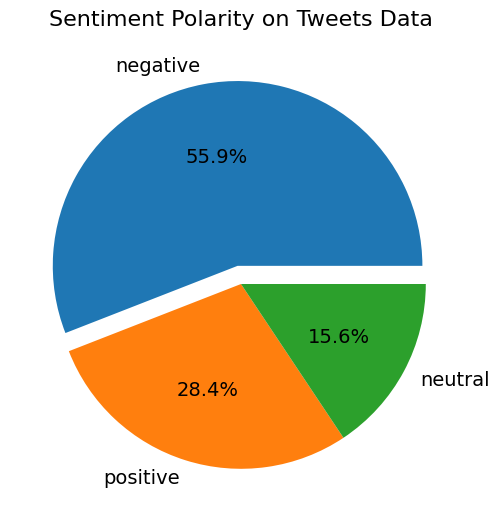

In [16]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data', fontsize = 16, pad = 20)
plt.show()

In [17]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:5]

,text_clean,polarity_score,polarity
1,serius nanya hasil ngumpul di jalan deklarasi umat islam bela palestina apa ya bang saya sendiri bingung kalau aktivitas galang dana kemanusiaan palestina oke lah biasa saya juga jadi panitia sama kalau bukan konflik agama kenapa kek umat islam doang yang bela palestina tidak jugagodeye,35,positive
2,adakah palestina di al quran darimana klaim tanah terjanji israel jadi milik palestina di quraan kalau nggak ada mengapa hamas berniat mendirikan negara islam palestina di atas tanah palestina palestina positif konflik agama dan kemudian aksi bela palestina di bitung gilaamurkabali,29,positive
3,kenapa pada palestina karena di palestina itu ada al quds atau masjid al aqsa situs umat islam yaitu kiblat ke umat islam setelah kabah di mekkah maka wajib hukumnya seluruh umat islam di dunia,27,positive
4,lho kok jadi umat islam yang terkesan di sudut kan situ waras aksi bela palestine itu aksi kemanusiaan karena di palestina itu bukan cmn agama islam dan yang ikut aksi pun bukan cmn agama islam karena ulah genk manguni lah shingga aksi damai kemanusiaan bela palestine mnjdi konflikhbtlm,25,positive
5,mayoritas pendukung palestina itu pasti beragama islam mereka mendukung palestina bukan karena simpati pada palestina,24,positive


In [18]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:5]

,text_clean,polarity_score,polarity
1,hk bodoh saya awalnya mengomentari video kekejian hamas yang membunuh orang non yahudi dengan cara mencangkul si korban sampai mati sungguh perbuatan biadab korban tidak ada hubungannya dengan konflik israel palestina tetapi ikut dibantai hamas jelmaan iblis sampai sini pahamnursyahbana,-51,negative
2,konflik israel amp palestina perang antara kelompok militan yang dipimpin oleh hamas yang melancarkan invasi dan serangan besarbesaran terhadap israel dari jalur gaza pada tanggal oktober lalu kelompok israel melakukan serangan genosida di jalur gaza daniebe,-45,negative
3,kedua pihak bersalah israel juga bersalah mencaplok wilayah palestina di west bank shg wajib kita lawan dan palestina juga bersalah tidak mau mengakui kehadiran negara israel shg wajib kita lawan konflik ini sulit terselesaikan jika kita berat sebelah memihak ke kubumelodiasyik,-40,negative
4,nah kan kelihatan gobloknya si goblok ini menganggap konflik israel palestina sebagai konflik agama tidak heran begitu ngotot membela hamas biarpun hamas itu teroris orang yang membela israel pun disebut anti islam tolol tolol elo kira di israel tidak ada muslim,-38,negative
5,bangun dari tidur melihat banyak skli fitnah kejam di dunia ini rasane pgnn tak antemi wong israel siji siji sak pakne sak pakde ne paklik e genset kebenaran selalu berusaha di plintir terkhususnya konflik palestina sama yang ini dalang e sudah pancet setan amerika ro barakaneiniintankok,-34,negative


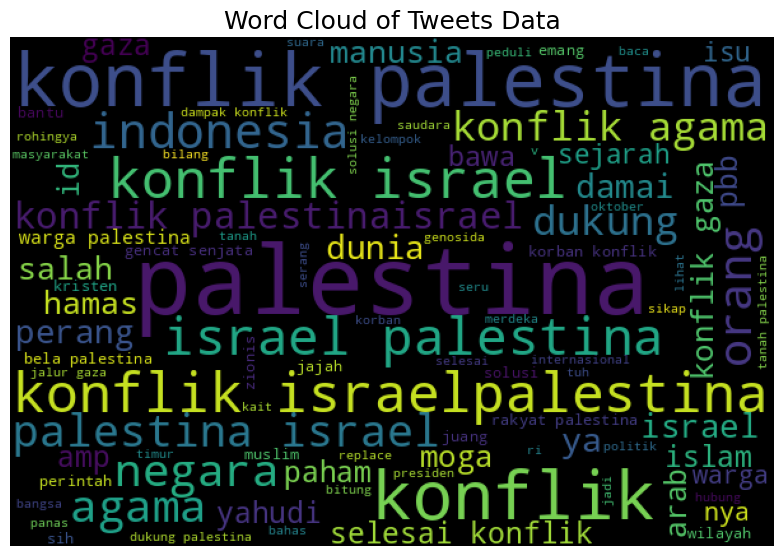

In [19]:

list_words=''
for tweet in tweets['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


In [20]:
def words_with_sentiment(text):
    positive_words = []
    negative_words = []
    for word in text:
        score_pos = 0
        score_neg = 0
        if word in lexicon:
            score_pos = lexicon[word]

        if score_pos > 0:
            positive_words.append(word)
        elif score_pos < 0:
            negative_words.append(word)

    return positive_words, negative_words

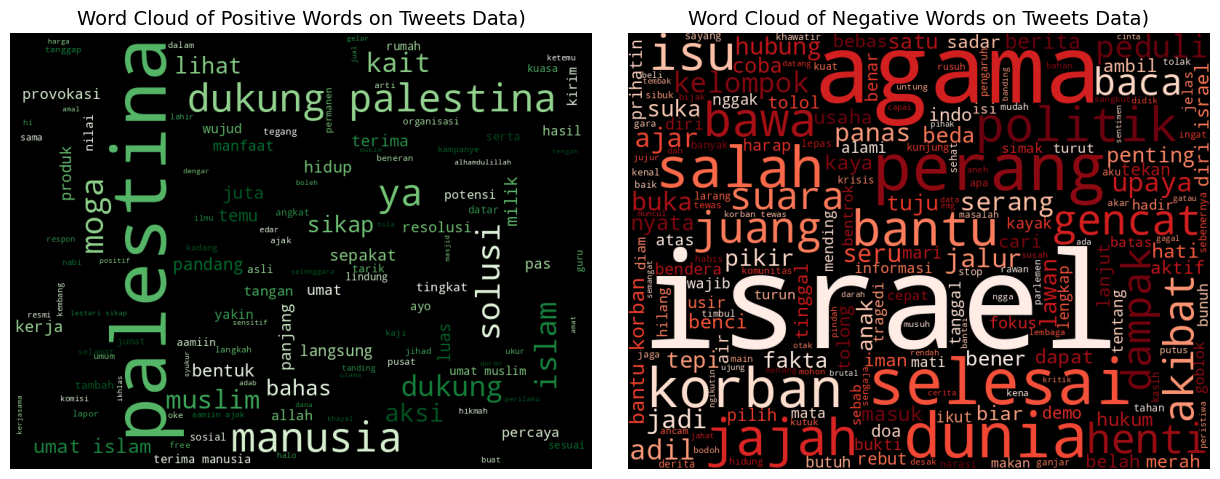

In [21]:
sentiment_words = tweets['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

In [22]:
data = pd.read_csv('/content/sentimen.csv')
data.head()

,text_clean,text_preprocessed,polarity_score,polarity
0,liga arab saja sangt berhati dalam menanggapi konflik israelpalestina mrk tidak gelp mata bela palestina karena seiman,"['liga', 'arab', 'sangt', 'hati', 'tanggap', 'konflik', 'israelpalestina', 'mrk', 'gelp', 'mata', 'bela', 'palestina', 'iman']",1,positive
1,kamu harus tahu,[],0,neutral
2,id mangkanya baca tong kamu mau saja dibodohi sama oknum junta kan mereka juga tidak pernah makan saat konflik jangan samaratakan semuanya nih lihat tragedi black september pengungsi palestina ingin menggulingkan pemerintahan raja jordania 👆 lebih parah mana mau kok gituwahyusigo,"['id', 'mangkanya', 'baca', 'tong', 'bodoh', 'oknum', 'junta', 'makan', 'konflik', 'samaratakan', 'nih', 'lihat', 'tragedi', 'black', 'september', 'ungsi', 'palestina', 'guling', 'perintah', 'raja', 'jordania', 'parah', 'gituwahyusigo']",-12,negative
3,adalah negara yang sangat kaya akan kekayaan alamnya,"['negara', 'kaya', 'kaya', 'alam']",-5,negative
4,perang di timur tengah selalu menjadi sorotan dunia dan isu yang paling sering mendapat perhatian adalah konflik antara palestina dan israel jasminejelita,"['perang', 'timur', 'sorot', 'dunia', 'isu', 'perhati', 'konflik', 'palestina', 'israel', 'jasminejelita']",-6,negative


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data['text_preprocessed'], data['polarity'], test_size=0.2, random_state=0)
tfidf_vectorizer = TfidfVectorizer(max_features=2000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [24]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)
y_pred = naive_bayes.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(RandomForestClassifier(random_state=0), X_train_tfidf, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Cross-Validation Scores: [0.67592593 0.7037037  0.6882716  0.68209877 0.72222222]
Mean CV Score: 0.6944444444444444
Accuracy: 0.57

Classification Report:
              precision    recall  f1-score   support

    negative       0.55      1.00      0.71       211
     neutral       0.00      0.00      0.00        67
    positive       0.88      0.17      0.29       128

    accuracy                           0.57       406
   macro avg       0.48      0.39      0.33       406
weighted avg       0.56      0.57      0.46       406


Confusion Matrix:
[[210   0   1]
 [ 65   0   2]
 [106   0  22]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data['text_preprocessed'], data['polarity'], test_size=0.2, random_state=0)
bow_vectorizer = CountVectorizer(max_features=1000)
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [26]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train_bow, y_train)

y_pred = random_forest.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.63      0.71       211
     neutral       0.41      0.70      0.52        67
    positive       0.66      0.65      0.65       128

    accuracy                           0.65       406
   macro avg       0.62      0.66      0.63       406
weighted avg       0.69      0.65      0.66       406


Confusion Matrix:
[[133  48  30]
 [  7  47  13]
 [ 25  20  83]]
